# Data Analysis

## Librerias

### Instalacion

In [80]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

### Importacion

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Funciones

### Funcion boxplot precio - campo pivote

In [82]:
def fncGenerarBoxPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los diferentes subsets, para venta y alquiler.
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp1[strCampoPivote] = dfTemp1[strCampoPivote].astype('category')

    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]
    dfTemp2[strCampoPivote] = dfTemp2[strCampoPivote].astype('category')


    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Generando la primera grafica (Alquiler)
    g1 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
    #g1.set(xticklabels=[])
    g1.set(title=strTitulo1)
    g1.set(xlabel=None)

    # Generando la segunda grafica (Venta)
    g2 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp2, ax=ax[1], palette = 'Blues')
    #g2.set(xticklabels=[])
    g2.set(title=strTitulo2)
    #g2.set(xlabel=None)

    return(plt)

### Funcion scatterplot precio - campo pivote

In [83]:
def fncGenerarScatterPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los subsets a evaluar
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]

    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Se genera la primera grafica
    g1 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp1, ax = ax[0])
    g1.set(title = strTitulo1)

    # Se genera la segunda grafica
    g2 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp2, ax = ax[1])
    g2.set(title = strTitulo2)

    return(plt)

### Funcion para construir modelo KMeans

In [84]:
def fncConstruirModeloKMeans(intKClusters, listColores, dfTemp1, factorRadio):
    
    # Se obtienen los valores que se utilizaran para la construccion de modelo KMeans
    X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

    # Construccion del modelo
    kmeanModel = KMeans(n_clusters = intKClusters, max_iter = 2000).fit(X)

    # Asignacion de clusters a registros
    dfTemp1['cluster'] = kmeanModel.labels_

    # Creacion del mapa ubicado en ciudad de Guatemala
    m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

    # Agregando marcadores circules
    for i in range(0,len(dfTemp1['precio_real'])):
        folium.Circle(
            location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
            popup=str(dfTemp1.iloc[i]['precio_real']) + '[' + str(dfTemp1.iloc[i]['cluster']) + ']'+ '\n' 
                + dfTemp1.iloc[i]['linkpagina'],
            radius=(dfTemp1.iloc[i]['precio_real']/(factorRadio * dfTemp1.iloc[i]['espacio_m2'])),
            color=listColores[dfTemp1.iloc[i]['cluster']],
            fill=True,
            fill_color=listColores[dfTemp1.iloc[i]['cluster']]).add_to(m)

    # Regresamos el objeto mapa
    return(m)

## Lectura Datos

In [85]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,2089.000000,2.089000e+03,2089,2089,441.000000,1263,1000,2089.000000,2083.000000,2083,...,2089,2088,1735,2089.000000,2089,2089,2089,2089,287,2.089000e+03
unique,NaN,NaN,1171,8,NaN,2,7,NaN,NaN,2,...,2,4,2,NaN,1089,1238,1160,1159,180,NaN
top,NaN,NaN,https://www.olx.com.gt/item/apartamento-en-ven...,2020-06-10,NaN,No,Entre 5 y 10 años,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,ALQUILO APARTAMENTO EN VILLA CANALES,2020-05-14T17:56:10-06:00,2020-08-20T10:46:28-06:00,"Fácil acceso por Villa Nueva, Petapa, Villa Ca...",PAA-041-01-19-V,NaN
freq,NaN,NaN,8,550,NaN,974,309,NaN,NaN,2076,...,1335,2051,1454,NaN,10,8,8,10,5,NaN
mean,1045.573001,1.095163e+09,NaN,NaN,938.292517,NaN,NaN,1.955960,2.269323,NaN,...,NaN,NaN,NaN,2.089995,NaN,NaN,NaN,NaN,NaN,3.953937e+07
std,603.610614,1.528355e+07,NaN,NaN,5122.267271,NaN,NaN,0.866011,0.808192,NaN,...,NaN,NaN,NaN,14.648158,NaN,NaN,NaN,NaN,NaN,2.466658e+07
min,1.000000,9.637780e+08,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.263970e+06
25%,523.000000,1.100240e+09,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.401211e+07
50%,1046.000000,1.100368e+09,NaN,NaN,0.000000,NaN,NaN,2.000000,2.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.745098e+07
75%,1568.000000,1.100389e+09,NaN,NaN,700.000000,NaN,NaN,2.000000,3.000000,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,6.162143e+07


## Data Wrangling

### Conversion Series

In [86]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
count,2089,2089,2089,2089,441.000000,1263,1000,2089.000000,2083.000000,2083,...,2089,2088,1735,2089.000000,2089,2089,2089,2089,2089,2089
unique,2089,1166,1171,8,NaN,2,7,NaN,NaN,2,...,2,4,2,NaN,1089,1238,1160,1159,181,221
top,1814,1067097109,https://www.olx.com.gt/item/apartamento-en-ven...,2020-06-10 00:00:00,NaN,No,Entre 5 y 10 años,NaN,NaN,No,...,US$,Apartamento,Inmobiliaria,NaN,ALQUILO APARTAMENTO EN VILLA CANALES,2020-05-14T17:56:10-06:00,2020-08-20T10:46:28-06:00,"Fácil acceso por Villa Nueva, Petapa, Villa Ca...",nan,24012106
freq,1,8,8,550,NaN,974,309,NaN,NaN,2076,...,1335,2051,1454,NaN,10,8,8,10,1802,292
first,NaN,NaN,NaN,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-06-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,938.292517,NaN,NaN,1.955960,2.269323,NaN,...,NaN,NaN,NaN,2.089995,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5122.267271,NaN,NaN,0.866011,0.808192,NaN,...,NaN,NaN,NaN,14.648158,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [87]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,moneda,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id
1630,1632,1007688385,https://www.olx.com.gt/item/venta-apartamento-...,2020-06-10,NaN,NaN,Entre 5 y 10 años,3,3.0,No,...,US$,Apartamento,Inmobiliaria,6,VENTA APARTAMENTO ZONA 10,2020-06-07T15:50:39-06:00,2020-09-05T15:50:39-06:00,LINDO APARTAMENTO CON AMBIENTES AMPLIOS E ILUM...,nan,55074295
974,976,1014321966,https://www.olx.com.gt/item/apartamentos-y-ofi...,2020-05-30,NaN,NaN,En construcción,2,1.0,No,...,US$,Apartamento,Inmobiliaria,1,"Apartamentos y Oficinas en Diagonal 6 zona 10,...",2020-05-27T16:38:13-06:00,2020-08-25T16:38:13-06:00,Edificio en el corazón de la zona 10 (Diago 6)...,nan,34408653
975,977,1014324725,https://www.olx.com.gt/item/apartamentos-nuevo...,2020-05-30,NaN,NaN,A estrenar,2,2.0,No,...,US$,Apartamento,Inmobiliaria,28,Apartamentos NUEVOS 2 y 3 dormitorios Vista He...,2020-05-27T16:34:58-06:00,2020-08-25T16:34:58-06:00,"Fontainebleau, preciosos apartamentos 2 y 3 do...",nan,34408653
965,967,1015576872,https://www.olx.com.gt/item/amplio-apartamento...,2020-05-30,NaN,No,Entre 5 y 10 años,2,2.0,No,...,Q,Apartamento,Inmobiliaria,13,Amplio Apartamento alquilado en Jardines de La...,2020-05-27T17:25:02-06:00,2020-08-25T17:25:02-06:00,Vendo apartamento 2 habitaciones en Jardines d...,nan,34408653
556,557,1023789298,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3.0,No,...,US$,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI,2020-05-23T14:54:00-06:00,2020-08-21T14:54:00-06:00,Edificio\n– Salón social\n– Parqueo de visitas...,nan,24012106
557,558,1023944274,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2.0,No,...,US$,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...",2020-05-23T14:49:40-06:00,2020-08-21T14:49:40-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106
559,560,1029720345,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,3.0,No,...,US$,Apartamento,Inmobiliaria,4,"VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...",2020-05-23T14:20:53-06:00,2020-08-21T14:20:53-06:00,Edificio:\n– Casa club con piscina\n– Cancha d...,nan,24012106
564,565,1030164820,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2.0,No,...,US$,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI",2020-05-23T14:19:45-06:00,2020-08-21T14:19:45-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106
578,579,1030987380,https://www.olx.com.gt/item/alquilo-renta-apar...,2020-05-25,NaN,No,NaN,1,2.0,No,...,US$,Apartamento,Inmobiliaria,1,ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...,2020-05-22T19:20:27-06:00,2020-08-20T19:20:27-06:00,Condominio\n– Áreas verdes\n– Casa club\n– Gim...,nan,24012106
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3.0,No,...,US$,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053


### Cambio Moneda Precio

In [88]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

,codigoencabezado,idregistro,linkpagina,fecharegistro,administracion,amueblado,antiguedad,banos,habitaciones,estudio,...,tipo,tipo_vendedor,favoritos,titulo,fecha_creacion,valido_hasta,descripcion,partner_code,user_id,precio_real
1630,1632,1007688385,https://www.olx.com.gt/item/venta-apartamento-...,2020-06-10,NaN,NaN,Entre 5 y 10 años,3,3.0,No,...,Apartamento,Inmobiliaria,6,VENTA APARTAMENTO ZONA 10,2020-06-07T15:50:39-06:00,2020-09-05T15:50:39-06:00,LINDO APARTAMENTO CON AMBIENTES AMPLIOS E ILUM...,nan,55074295,2299310.00
974,976,1014321966,https://www.olx.com.gt/item/apartamentos-y-ofi...,2020-05-30,NaN,NaN,En construcción,2,1.0,No,...,Apartamento,Inmobiliaria,1,"Apartamentos y Oficinas en Diagonal 6 zona 10,...",2020-05-27T16:38:13-06:00,2020-08-25T16:38:13-06:00,Edificio en el corazón de la zona 10 (Diago 6)...,nan,34408653,1207330.00
975,977,1014324725,https://www.olx.com.gt/item/apartamentos-nuevo...,2020-05-30,NaN,NaN,A estrenar,2,2.0,No,...,Apartamento,Inmobiliaria,28,Apartamentos NUEVOS 2 y 3 dormitorios Vista He...,2020-05-27T16:34:58-06:00,2020-08-25T16:34:58-06:00,"Fontainebleau, preciosos apartamentos 2 y 3 do...",nan,34408653,922800.00
965,967,1015576872,https://www.olx.com.gt/item/amplio-apartamento...,2020-05-30,NaN,No,Entre 5 y 10 años,2,2.0,No,...,Apartamento,Inmobiliaria,13,Amplio Apartamento alquilado en Jardines de La...,2020-05-27T17:25:02-06:00,2020-08-25T17:25:02-06:00,Vendo apartamento 2 habitaciones en Jardines d...,nan,34408653,6000.00
556,557,1023789298,https://www.olx.com.gt/item/alquilo-apartament...,2020-05-25,NaN,No,NaN,2,3.0,No,...,Apartamento,Inmobiliaria,1,ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI,2020-05-23T14:54:00-06:00,2020-08-21T14:54:00-06:00,Edificio\n– Salón social\n– Parqueo de visitas...,nan,24012106,9612.50
557,558,1023944274,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2.0,No,...,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...",2020-05-23T14:49:40-06:00,2020-08-21T14:49:40-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106,1647474.84
559,560,1029720345,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,3.0,No,...,Apartamento,Inmobiliaria,4,"VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...",2020-05-23T14:20:53-06:00,2020-08-21T14:20:53-06:00,Edificio:\n– Casa club con piscina\n– Cancha d...,nan,24012106,5190750.00
564,565,1030164820,https://www.olx.com.gt/item/vendo-apartamento-...,2020-05-25,NaN,NaN,NaN,2,2.0,No,...,Apartamento,Inmobiliaria,0,"VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI",2020-05-23T14:19:45-06:00,2020-08-21T14:19:45-06:00,Edificio\n– Piscina\n– Gimnasio\n– Baby gym\n–...,nan,24012106,1647474.84
578,579,1030987380,https://www.olx.com.gt/item/alquilo-renta-apar...,2020-05-25,NaN,No,NaN,1,2.0,No,...,Apartamento,Inmobiliaria,1,ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...,2020-05-22T19:20:27-06:00,2020-08-20T19:20:27-06:00,Condominio\n– Áreas verdes\n– Casa club\n– Gim...,nan,24012106,4806.25
323,324,1033662607,https://www.olx.com.gt/item/se-alquila-apartam...,2020-05-20,NaN,No,NaN,3,3.0,No,...,Apartamento,Inmobiliaria,1,Se alquila Apartamento en zona 16 en el sector...,2020-04-29T14:13:30-06:00,2020-07-28T14:13:30-06:00,"Apartamento para estrenar muy cerca a Cayalá, ...",nan,15462053,23070.00


### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [89]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    730
Venta       436
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

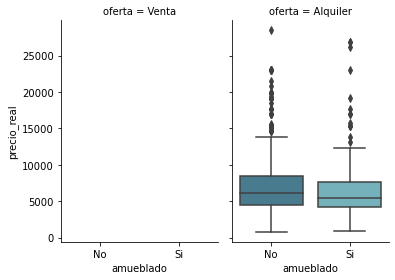

In [90]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

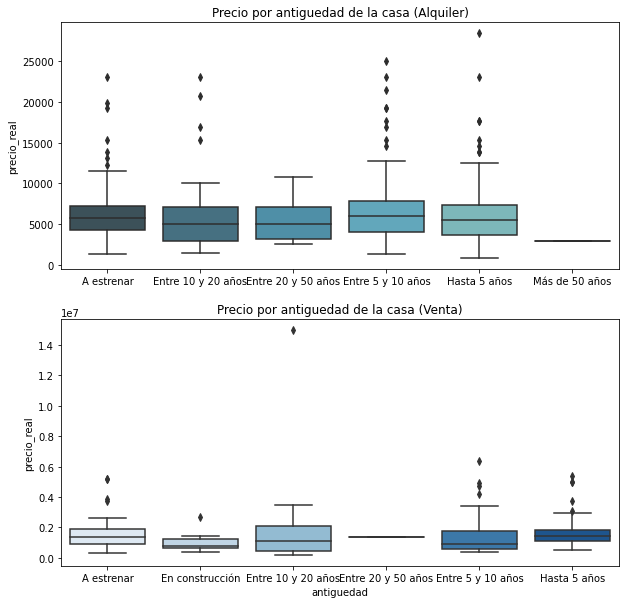

In [91]:
plt = fncGenerarBoxPlot('precio_real', 'antiguedad', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()


### Precio por moneda

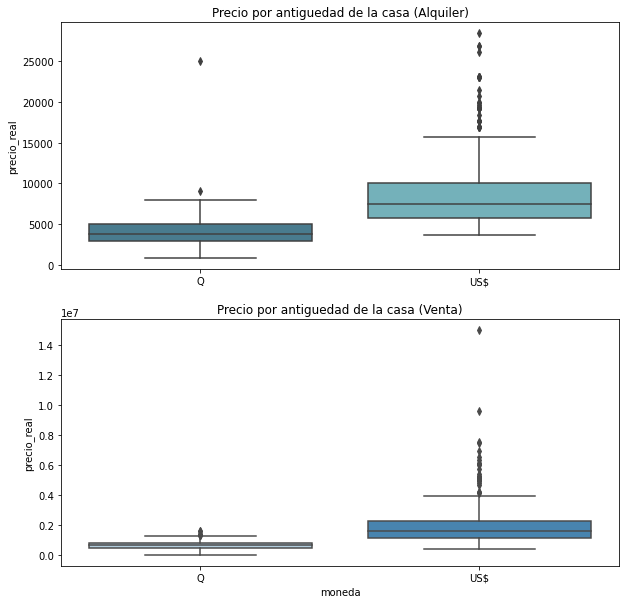

In [92]:
plt = fncGenerarBoxPlot('precio_real', 'moneda', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()

### Precio por banos

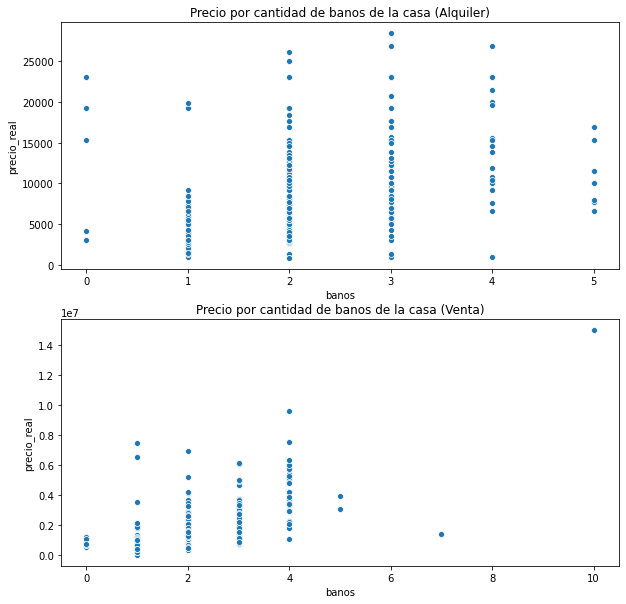

In [93]:
plt = fncGenerarScatterPlot('precio_real', 'banos', 
                            'Precio por cantidad de banos de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

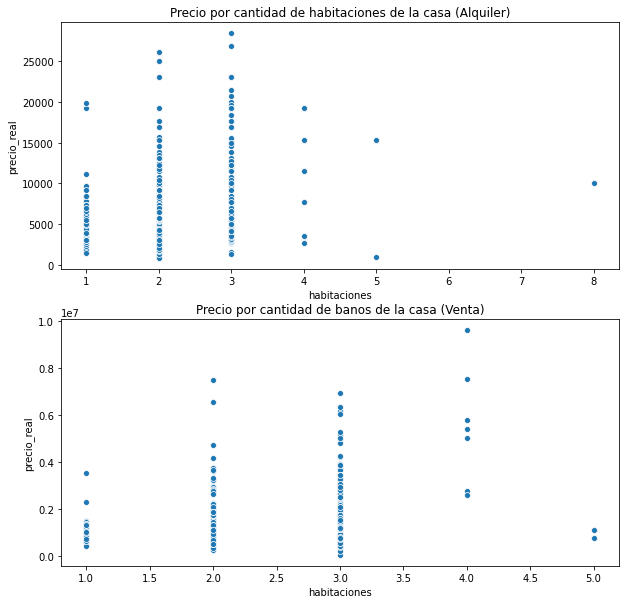

In [94]:
plt = fncGenerarScatterPlot('precio_real', 'habitaciones', 
                            'Precio por cantidad de habitaciones de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

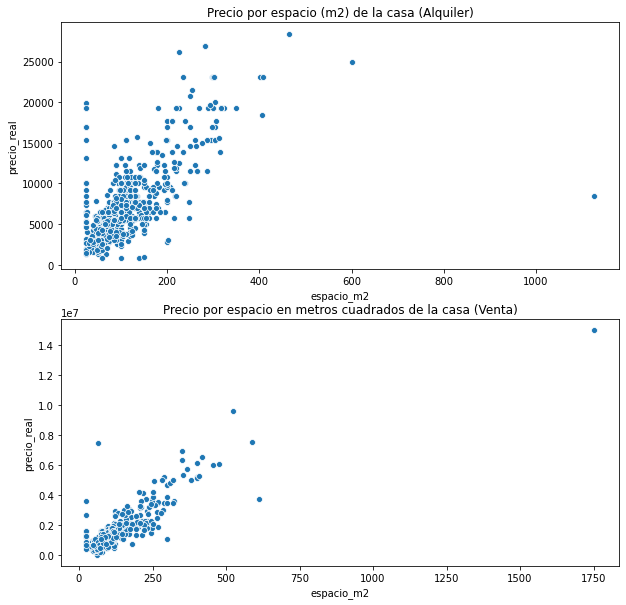

In [95]:
plt = fncGenerarScatterPlot('precio_real', 'espacio_m2', 
                            'Precio por espacio (m2) de la casa (Alquiler)',
                            'Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

In [97]:
#dfTemp = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Venta') & (dfAnalisisSet['precio_real'] < 1800000) &
                          #(dfAnalisisSet['espacio_m2'] > 250), ['codigoencabezado', 'espacio_m2', 'precio_real']]

#dfTemp.head()

### Precio y ubicacion

In [98]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 5,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [100]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 500,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

### Precio por parqueo (tiene o no)

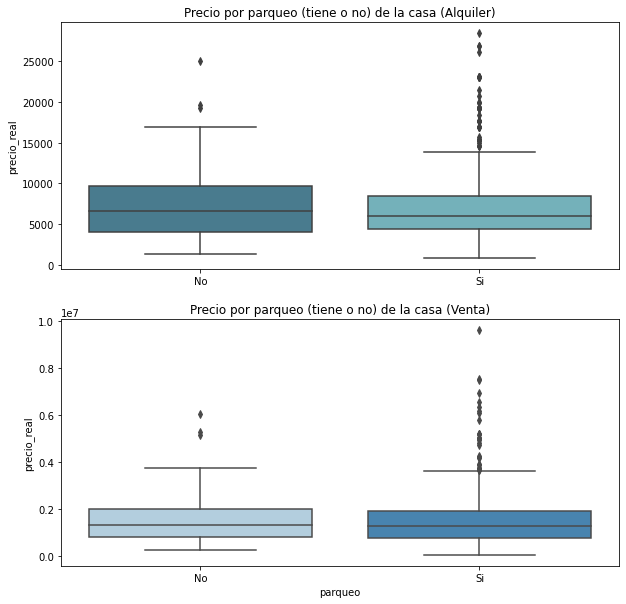

In [101]:
plt = fncGenerarBoxPlot('precio_real', 'parqueo', 
                        'Precio por parqueo (tiene o no) de la casa (Alquiler)', 
                        'Precio por parqueo (tiene o no) de la casa (Venta)')
plt.show()

### Precio por tipo(casa o apartamento)

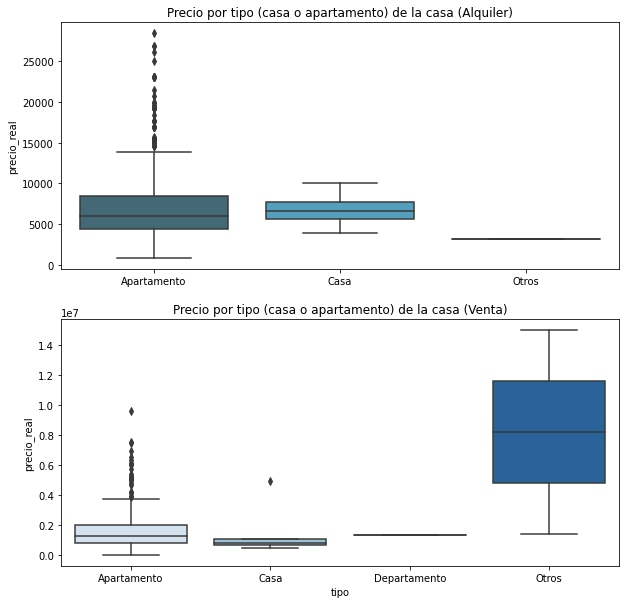

In [102]:
plt = fncGenerarBoxPlot('precio_real', 'tipo', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por tipo de vendedor

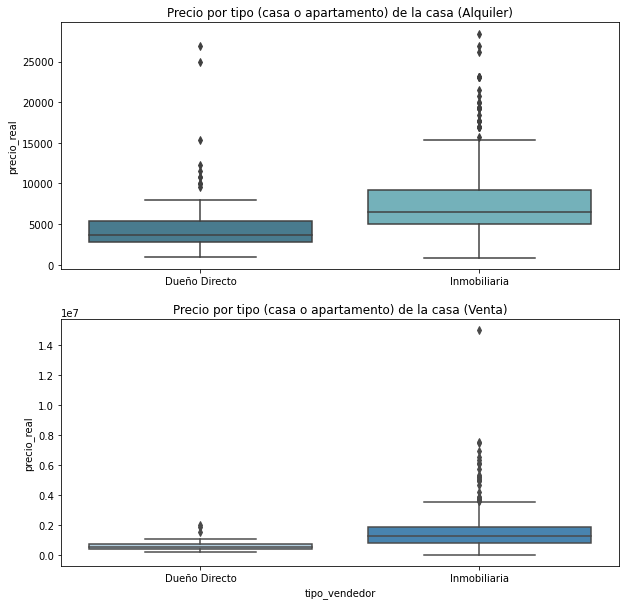

In [103]:
plt = fncGenerarBoxPlot('precio_real', 'tipo_vendedor', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por favoritos

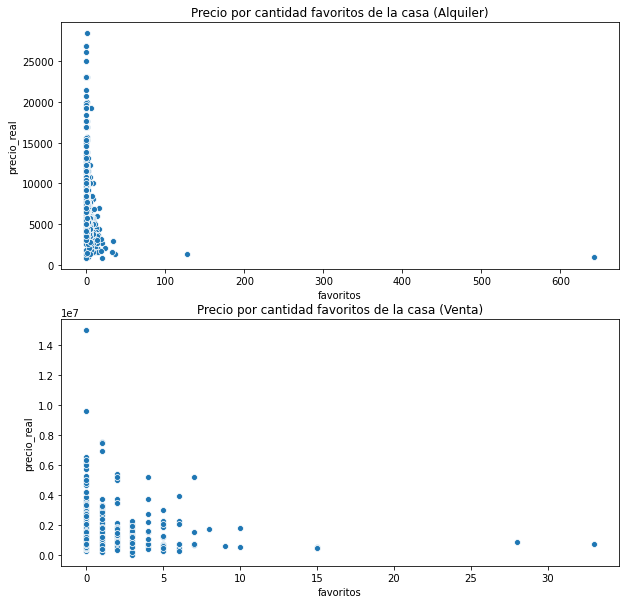

In [104]:
plt = fncGenerarScatterPlot('precio_real', 'favoritos', 
                            'Precio por cantidad favoritos de la casa (Alquiler)',
                            'Precio por cantidad favoritos de la casa (Venta)')

plt.show()

### Elbow - KMeans (Venta)

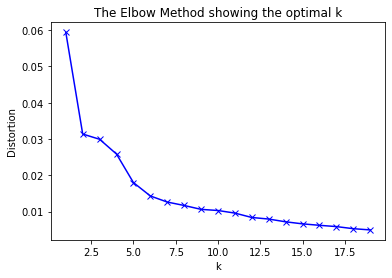

In [105]:
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

# Determinacion de valor K
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Precio Ubicacion Clusterizados (Venta)

In [106]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 500)

# Mostrar mapa
m

### Precio Ubicacion Clusterizados (Alquiler)

In [107]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 5)

# Mostrar mapa
m